# Data Analytics

#### Background Info / Assumptions

- NBA playoffs are a best-of-seven elimination tournament annually held after the National Basketball Association's regular season to determine the league's champion
- Playoffs should be better players? 
- 4 periods per game  (but upto 8 for some games - extra time?)
- 12 minutes per period
- Time field is descending clock time of free throw 
- Winning teams: teams who make finals = teams who play the most games in the playoffs? => winner is highest scoring team with most games in final? 
- 16 teams make it to playoffs per season?
"The first round of the NBA playoffs, or conference quarterfinals, consists of four match-ups in each conference based on the seedings (1–8, 2–7, 3–6, and 4–5). The four winners advance to the second round, or conference semifinals, with a match-up between the 1–8 and 4–5 winners and a match-up between the 2–7 and 3–6 winners. The two winners advance to the third round, or conference finals. The winner from each conference will advance to the final round, or the NBA Finals."

#### Open Questions / Ideas

- Correlation between scoring free throw when team already winning vs losing?
- Correlation between scoring free throw and period of game?
- Scoring streak - num games without misses for players?
- Scoring free throw to win game?
- Playoffs scores are top scorers in regular games because teams making it to playoff?
- Top scorers in Regulars become top scorers in playoffs
- High scoring games have more free throws - excl extra time 


## Data

#### Existing
```
end_result    string 'score_a - score_b'
game          string 'team_a - team_b'
game_id       int
period        int {1-8}
play          string description 'player_x misses/makes free throw 1/2 of 2'
player        string name
playoffs      categorical 'playoffs/regular'
score         string 'score_a - score_b'
season        string 'start_year - end_year'
shot_made     int bool
time          string 
```

#### New
```
team_a        categorical
team_b        categorical
score_a       int
score_b       int
winner        categorical
```

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from src.data_manipulation import add_winning_team, create_team_per_season_scores_df, get_winning_teams_per_season, get_top_scoring_teams_per_season
from src.utilities import add_info_a, add_info_b

## Data

In [2]:
dtype={'game_id': int, 'period': int}

df = pd.read_csv('../../data/free_throws.csv', dtype=dtype)

### Add additional fields

In [3]:
# Add team fields to identify teams in game
df['team_a'] = df.game.apply(add_info_a)
df['team_b'] = df.game.apply(add_info_b)

# Add score fields to identify corresponding end result scores
df['score_a'] = df.end_result.apply(add_info_a)
df['score_b'] = df.end_result.apply(add_info_b)

# Convert scores to ints
df['score_a'] = pd.to_numeric(df['score_a'])
df['score_b'] = pd.to_numeric(df['score_b'])

# Add winning team
df['winner'] = df.apply(add_winning_team, axis=1)

### Log info

In [4]:
teams = set(df.team_a) | set(df.team_b)
seasons = set(df.season)
total_games = len(set(df.game_id))

regular_games = df.loc[df.playoffs == 'regular']
playoff_games = df.loc[df.playoffs == 'playoffs']

total_reg = len(set(regular_games.game_id))
total_playoff = len(set(playoff_games.game_id))

print("Total teams: {}".format(len(teams)))
print("Total seasons: {}".format(len(set(df.season))))
print("Total regular games: {} [{:.2f}%]".format(total_reg, total_reg/total_games * 100.0))
print("Total playoff games: {} [{:.2f}%]".format(total_playoff, total_playoff/total_games * 100.0))
print("Total scoring players: {}".format(len(set(df.player))))
print("Total scoring players in regulars: {}".format(len(set(regular_games.player))))
print("Total scoring players in playoffs: {}".format(len(set(playoff_games.player))))

Total teams: 34
Total seasons: 10
Total regular games: 12038 [93.51%]
Total playoff games: 836 [6.49%]
Total scoring players: 1098
Total scoring players in regulars: 1097
Total scoring players in playoffs: 592


# Visualisation

## Q: Are highest scoring teams per season the winning teams?
## A: No 😅

#### Just look at playoffs for simplicity

- gold winners: teams who've won the most games per season
- silver winners: teams who've won the second most games per season
- top scorers: teams with highest total scores per season

In [5]:
gold_winners, silver_winners = get_winning_teams_per_season(playoff_games)
top_scoring_teams = get_top_scoring_teams_per_season(playoff_games)

print("SEASON\t\tTOP SCORERS\tGOLD WINNERS\tSILVER WINNERS")
for seas in sorted(seasons):
    winner1 = gold_winners[seas]
    winner2 = silver_winners[seas]
    top_scorer = top_scoring_teams[seas]
    
    print("{}\t{}\t\t{}\t\t{}".format(seas, top_scorer, winner1, winner2))

SEASON		TOP SCORERS	GOLD WINNERS	SILVER WINNERS
2006 - 2007	SA		CLE		UTAH
2007 - 2008	BOS		BOS		LAL
2008 - 2009	LAL		ORL		LAL
2009 - 2010	LAL		BOS		LAL
2010 - 2011	DAL		MIA		DAL
2011 - 2012	MIA		OKC		MIA
2012 - 2013	MIA		SA		MIA
2013 - 2014	SA		SA		MIA
2014 - 2015	GS		GS		CLE
2015 - 2016	GS		CLE		GS


In [22]:
gold_scores_df = create_team_per_season_scores_df(df=playoff_games, teams_per_season_dict=gold_winners)
silver_scores_df = create_team_per_season_scores_df(df=playoff_games, teams_per_season_dict=silver_winners)
top_scores_df = create_team_per_season_scores_df(df=playoff_games, teams_per_season_dict=top_scoring_teams)

gold_scores_df.columns=['gold_winning_team', 'gold_winning_total_points']
silver_scores_df.columns=['silver_winning_team', 'silver_winning_total_points']
top_scores_df.columns=['top_scoring_team', 'top_total_points']

scores_df = gold_scores_df.merge(silver_scores_df, left_index=True, right_index=True)
scores_df = scores_df.merge(top_scores_df, left_index=True, right_index=True)

In [8]:
scores_df

,gold_winning_team,gold_winning_total_points,silver_winning_team,silver_winning_total_points,top_scoring_team,top_total_points
season,,,,,,
2006 - 2007,CLE,1776,UTAH,1664,SA,1913
2007 - 2008,BOS,2444,LAL,2151,BOS,2444
2008 - 2009,ORL,2327,LAL,2355,LAL,2355
2009 - 2010,BOS,2253,LAL,2325,LAL,2325
2010 - 2011,MIA,1948,DAL,2063,DAL,2063
2011 - 2012,OKC,2025,MIA,2239,MIA,2239
2012 - 2013,SA,2107,MIA,2234,MIA,2234
2013 - 2014,SA,2446,MIA,1945,SA,2446
2014 - 2015,GS,2169,CLE,1980,GS,2169


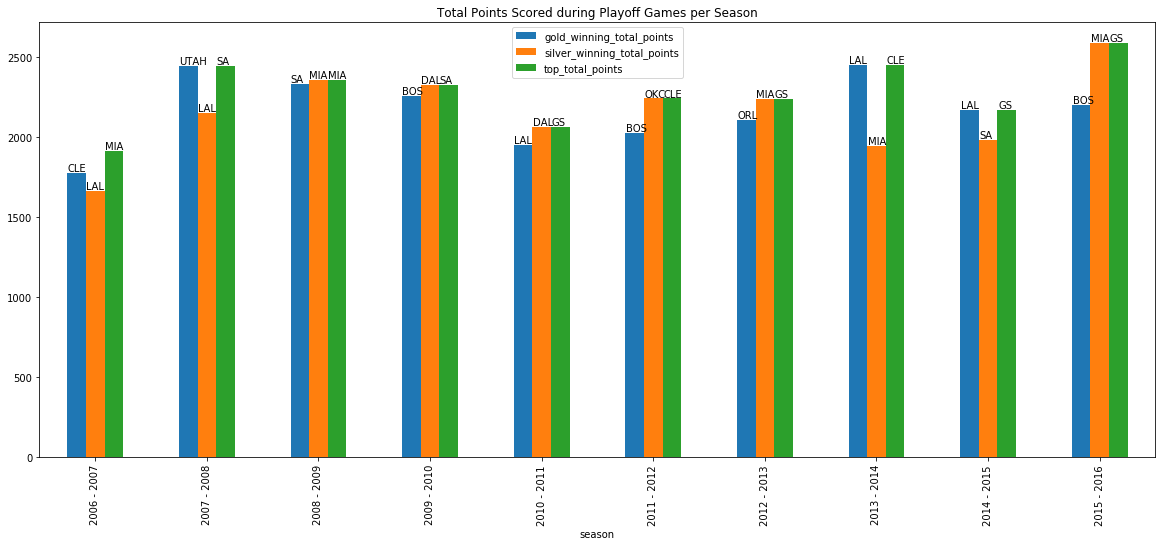

In [32]:
ax = scores_df[['gold_winning_total_points', 'silver_winning_total_points', 'top_total_points']].plot.bar(
    figsize=(20,8),
    title='Total Points Scored during Playoff Games per Season'
)

names = scores_df[['gold_winning_team', 'silver_winning_team', 'top_scoring_team']].values.flatten()

for idx, p in enumerate(ax.patches):
    ax.annotate(names[idx], (p.get_x() * 1.001, p.get_height() * 1.005))

### Key Points

- Winning teams are not necessarly the top scoring teams: 2/10 times 
- Top scoring teams come in 2nd place more often than 1st: 6/10 times


### Q: How much less/more points did the top scorers or silver winners score compared to the gold winners?

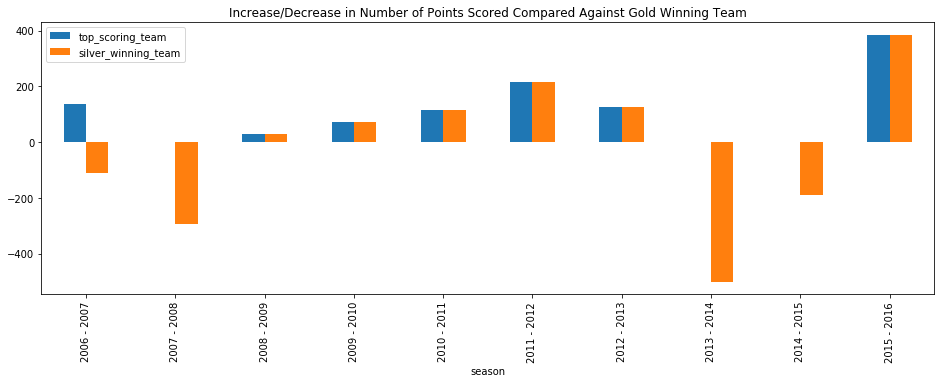

In [14]:
def get_point_difference(row, field):
    return row[field] - row['gold_winning_total_points']

scores_df['top_scoring_team_pts'] = scores_df.apply(lambda r: get_point_difference(r, 'top_total_points'), axis=1)
scores_df['silver_winning_team_pts'] = scores_df.apply(lambda r: get_point_difference(r, 'silver_winning_total_points'), axis=1)

scores_df[['top_scoring_team_pts', 'silver_winning_team_pts']].plot.bar(
    figsize=(16, 5),
    title='Increase/Decrease in Number of Points Scored Compared Against Gold Winning Team'
)

## Output

In [36]:
df.to_csv('../../data/formatted_free_throws.csv', index=False)